[YouTube Spam Collection Dataset](https://archive-beta.ics.uci.edu/ml/datasets/youtube+spam+collection)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [8]:
train_data = []
data_files = ['Youtube01-Psy.csv','Youtube02-KatyPerry.csv','Youtube03-LMFAO.csv','Youtube04-Eminem.csv','Youtube05-Shakira.csv']
for file in data_files:
    data = pd.read_csv("./data/" + file)
    train_data.append(data)

In [10]:
train_data = pd.concat(train_data)
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [13]:
train_data["CLASS"].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [39]:
content_data = train_data.drop(['COMMENT_ID','AUTHOR','DATE'], axis=1, inplace=False)

In [40]:
content_data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [41]:
content_data.tail()

,CONTENT,CLASS
365,I love this song because we sing it at Camp al...,0
366,I love this song for two reasons: 1.it is abou...,0
367,wow,0
368,Shakira u are so wiredo,0
369,Shakira is the best dancer,0


In [42]:
content_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [43]:
import re

In [44]:
" ".join(re.findall("[A-Za-z]+","hello there. -- good #@ bye!!!"))

'hello there good bye'

In [45]:
def keepOnlyChars(str):
    return " ".join(re.findall("[A-Za-z]+",str))

In [46]:
keepOnlyChars("hello there. -- good #@ bye!!!")

'hello there good bye'

In [47]:
content_data["FORMATTED_CONTENT"] = content_data["CONTENT"].apply(keepOnlyChars)

In [48]:
content_data.head()

,CONTENT,CLASS,FORMATTED_CONTENT
0,"Huh, anyway check out this you[tube] channel: ...",1,Huh anyway check out this you tube channel kob...
1,Hey guys check out my new channel and our firs...,1,Hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com,1,just for test I have to say murdev com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch v vtaRGgvGtWQ Check this out


In [49]:
final_data = content_data.drop(["CONTENT"], axis=1, inplace=False)

In [50]:
final_data.head()

,CLASS,FORMATTED_CONTENT
0,1,Huh anyway check out this you tube channel kob...
1,1,Hey guys check out my new channel and our firs...
2,1,just for test I have to say murdev com
3,1,me shaking my sexy ass on my channel enjoy
4,1,watch v vtaRGgvGtWQ Check this out


In [52]:
final_data = final_data[["FORMATTED_CONTENT", "CLASS"]]

In [53]:
final_data.head()

,FORMATTED_CONTENT,CLASS
0,Huh anyway check out this you tube channel kob...,1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev com,1
3,me shaking my sexy ass on my channel enjoy,1
4,watch v vtaRGgvGtWQ Check this out,1


In [55]:
len(final_data["FORMATTED_CONTENT"])

1956

In [80]:
final_data["CLASS"].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [78]:
class_df = pd.DataFrame({"CLASS": ["Spam", "Not Spam"], "COUNT": final_data["CLASS"].value_counts()})

In [79]:
class_df

,CLASS,COUNT
1,Spam,1005
0,Not Spam,951


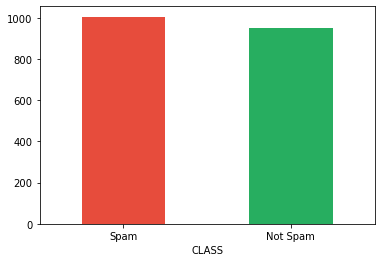

In [103]:
ax = class_df.plot.bar(x="CLASS", y="COUNT", rot=0, legend=False, color=["#e74c3c", "#27ae60"])